# covid19 Data state wise

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("state_wise_daily.csv")
df

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,17-Sep-20,Recovered,87778,33,10712,180,2246,1465,379,5226,...,2248,1333,67,5524,2108,521,4715,533,2948,0
563,17-Sep-20,Deceased,1175,0,72,0,17,7,5,17,...,54,14,4,59,9,5,81,13,60,0
564,18-Sep-20,Confirmed,84410,0,8096,154,0,1147,260,3842,...,2774,1817,29,5488,2043,273,6494,0,3192,0
565,18-Sep-20,Recovered,90018,0,11803,139,2074,1678,353,3281,...,2640,1580,68,5525,1802,603,6806,0,2960,0


In [3]:
df=df.iloc[:528] #selecting data from 14-mar tho 5-sep
df

,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,Confirmed,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,Recovered,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,Deceased,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,Confirmed,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,Recovered,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,04-Sep-20,Recovered,69625,40,12334,113,2020,1435,222,658,...,1272,679,17,6334,2011,179,5006,502,3305,0
524,04-Sep-20,Deceased,950,1,76,0,15,13,5,22,...,49,13,0,79,10,3,71,12,58,0
525,05-Sep-20,Confirmed,90600,35,10825,139,2698,1727,234,2529,...,1514,1566,58,5870,2511,691,6590,950,3042,0
526,05-Sep-20,Recovered,73161,41,11941,101,2343,1965,185,879,...,1306,1346,26,5859,2579,271,5141,535,3248,0


In [4]:
def total_cases():
    total=df.groupby(['Status','TT']).size().reset_index().groupby('Status')[['TT']].sum() # total number of cases
    return total
total_cases()

,TT
Status,
Confirmed,4110184
Deceased,63389
Recovered,3177643


In [5]:
def total_delhi():   # max cases in delhi
    delhi = df.groupby(['Status','DL']).size().reset_index().groupby('Status')[['DL']].sum()
    return delhi
total_delhi()  

,DL
Status,
Confirmed,184918
Deceased,2904
Recovered,160990


In [6]:
# sum of cases in delhi and maharashtra
def dl_mh():
    df["sum"]= df["DL"]+df["MH"] 
    df_sum=df[['Status','DL',"MH","sum"]]
    dl_mh=df_sum.groupby(['Status','sum']).size().reset_index().groupby('Status')[['sum']].sum()
    return dl_mh
dl_mh()

,sum
Status,
Confirmed,1072031
Deceased,25509
Recovered,800001


In [7]:
df=df.drop('sum',axis=1)

In [8]:
df.groupby(['Status']).max()

,Date,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Status,,,,,,,,,,,,,,,,,,,,,
Confirmed,31-May-20,90600,149,10830,214,4593,4071,276,2667,64,...,1746,1570,149,6993,3018,691,6590,950,3274,1043
Deceased,31-May-20,2004,4,97,2,15,22,7,22,1,...,106,17,1,518,14,10,95,18,74,0
Recovered,31-May-20,73161,148,12750,150,3259,4140,222,879,72,...,2226,2550,120,7758,2611,410,5863,604,3346,0


In [9]:
df.groupby(["Status"]).min()

,Date,TT,AN,AP,AR,AS,BR,CH,CT,DN,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Status,,,,,,,,,,,,,,,,,,,,,
Confirmed,01-Apr-20,11,0,0,0,0,0,0,0,0,...,-3,0,0,0,0,-2,0,0,0,-1295
Deceased,01-Apr-20,0,0,0,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
Recovered,01-Apr-20,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,-19,0


In [10]:
delhi_max=df.groupby(['Status','Date','DL']).size().reset_index().groupby('Status')[['Date','DL']].max()
delhi_max

,Date,DL
Status,,
Confirmed,31-May-20,3947
Deceased,31-May-20,437
Recovered,31-May-20,7725


In [11]:
df_active = df.groupby(['Status']).sum()
df_active

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
Status,,,,,,,,,,,,,,,,,,,,,
Confirmed,4110211,3288,487331,4914,123821,145861,5502,43163,2533,0,...,61527,89363,1914,457697,137885,14524,259765,23961,177701,0
Deceased,70094,50,4347,8,356,750,69,356,2,0,...,1808,1122,5,7751,877,136,3843,330,3510,0
Recovered,3177666,2895,382104,3381,95061,128376,3290,20487,2230,0,...,43849,73245,1348,398366,104603,8483,195959,15982,150801,0


In [12]:
df_cases = df[df['Status'] == 'Confirmed'].copy()
df_cases.drop(columns = ['Status'], inplace=True)
df_deaths = df[df['Status'] == 'Deceased'].copy()
df_deaths.drop(columns = ['Status'], inplace=True)
df_recovered = df[df['Status'] == 'Recovered'].copy()
df_recovered.drop(columns = ['Status'], inplace=True)

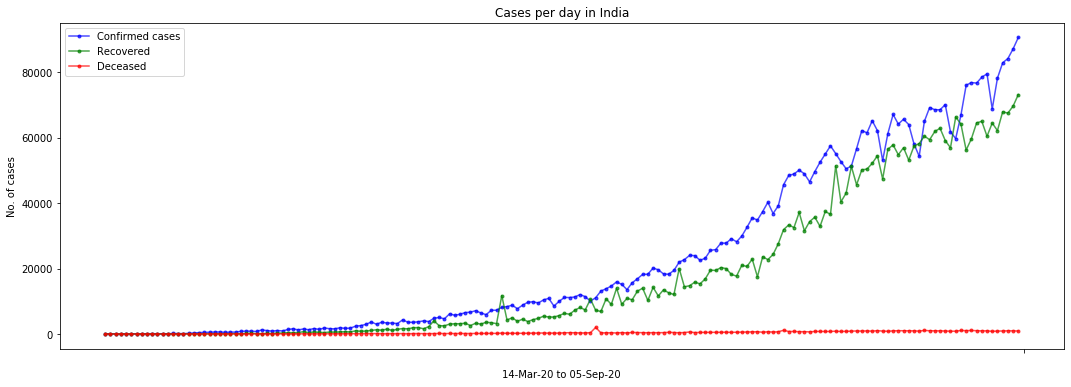

In [13]:
plt.figure(figsize = (18,6))
plt.plot(df_cases['Date'], df_cases['TT'],'.-', alpha=0.7, color='b', label='Confirmed cases')
plt.plot(df_recovered['Date'], df_recovered['TT'],'.-', alpha=0.7, color='g', label='Recovered')
plt.plot(df_deaths['Date'], df_deaths['TT'],'.-', alpha=0.7, color='r', label='Deceased')
plt.legend()
plt.title("Cases per day in India")
plt.xticks(ticks=' ')
plt.xlabel(f'{df_cases.iloc[0][0]} to {df_cases.iloc[-1][0]}')
plt.ylabel('No. of cases');

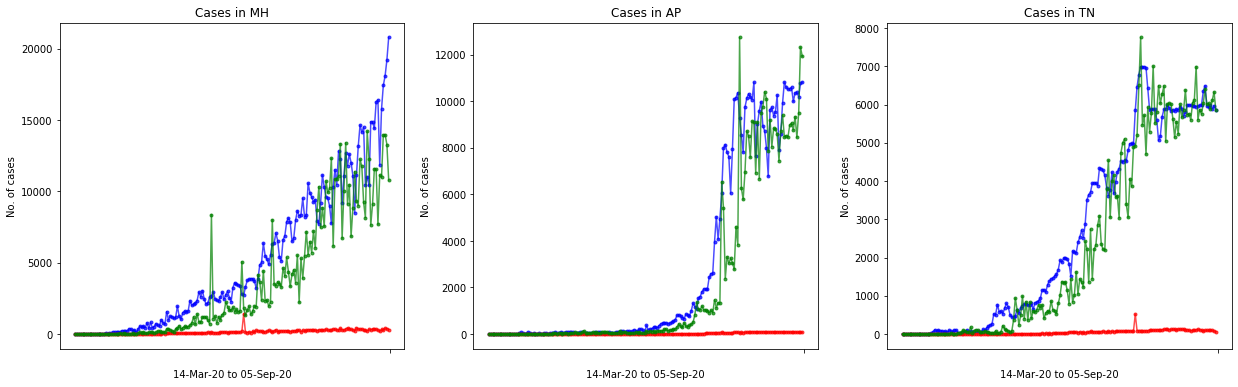

In [14]:
top_3 = sorted(df_cases.sum().values[1:], reverse=True)[1:4]
top3_states=[]
for i in top_3:
    top3_states.append(df_cases.sum()[df_cases.sum() == i].index)


fig, ax = plt.subplots(1,3,figsize = (21,6))
for i in range(3):
    state = top3_states[i].values[0]
    ax[i].plot(df_cases['Date'], df_cases[state],'.-', color='b', alpha=0.7)
    ax[i].plot(df_deaths['Date'], df_deaths[state],'.-', color='r', alpha=0.7)
    ax[i].plot(df_recovered['Date'], df_recovered[state],'.-', color='g', alpha=0.7)
    
    ax[i].set_title(f"Cases in {state}")
    ax[i].set_xticks(ticks=' ')
    ax[i].set_xlabel(f'{df_cases.iloc[0][0]} to {df_cases.iloc[-1][0]}')
    ax[i].set_ylabel('No. of cases');

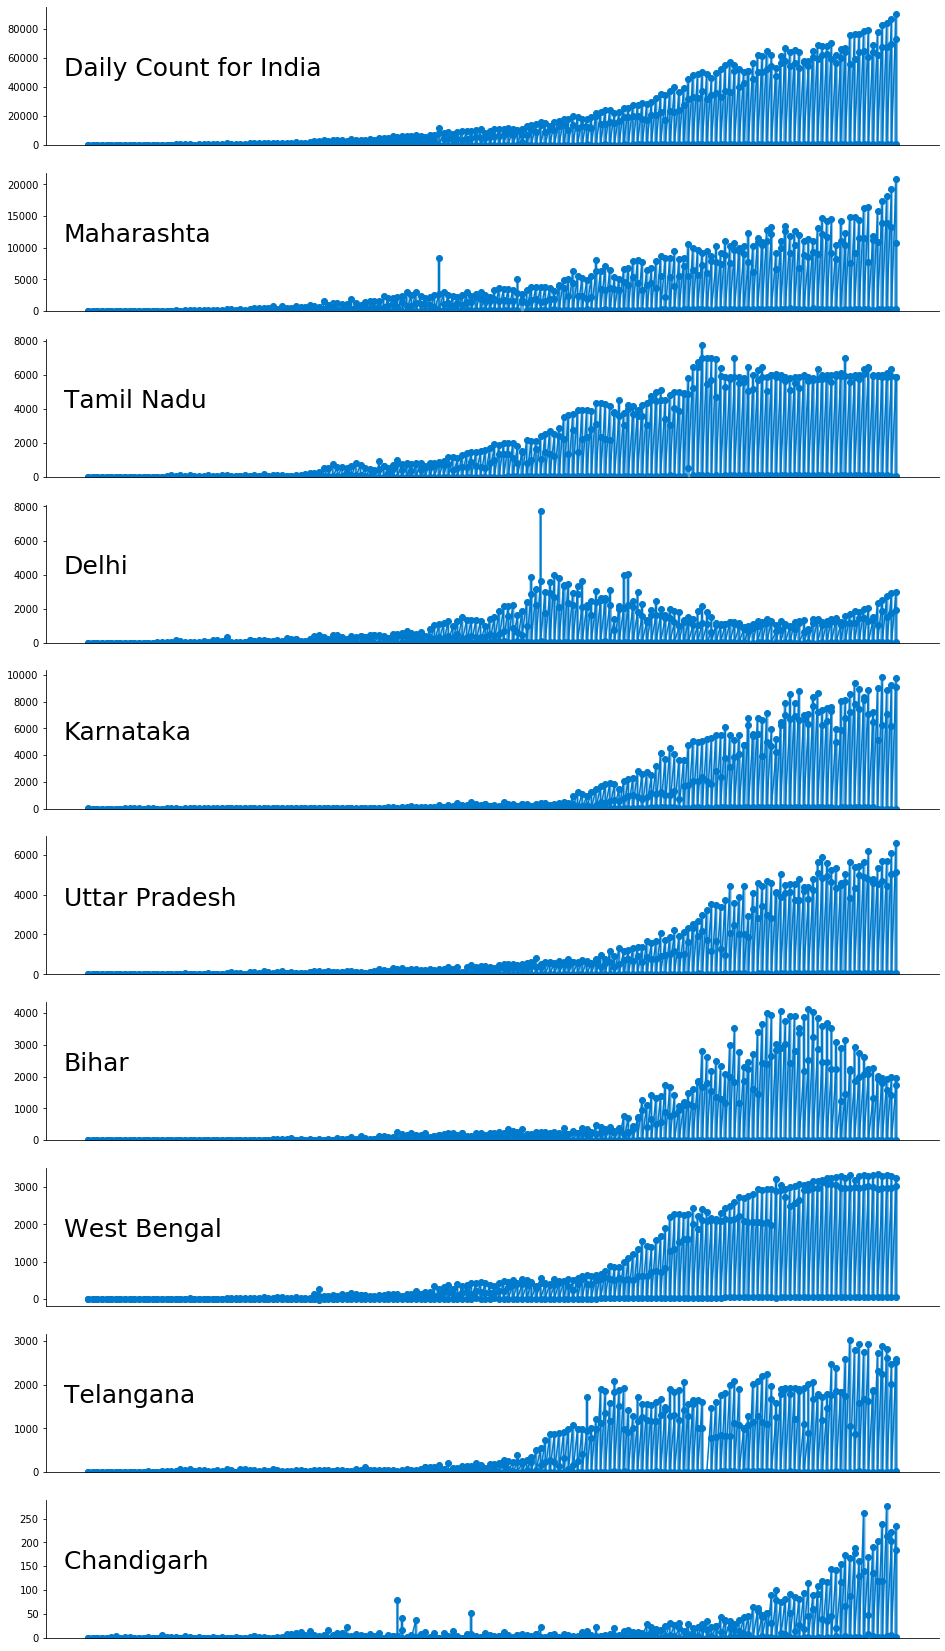

In [15]:
n = 10

st = ["TT", "MH", "TN", "DL", "KA", "UP", "BR", "WB", "TG", "CH"]
st_name = ["Daily Count for India", "Maharashta", "Tamil Nadu", "Delhi", "Karnataka", "Uttar Pradesh", "Bihar", "West Bengal", "Telangana", "Chandigarh "]
ax = []
fig = plt.figure(figsize = (16,30))
gs = fig.add_gridspec(n, 3)

for i in range(n):
    ax1 = fig.add_subplot(gs[i, :])
    ax1.bar(df.Date,df[st[i]],alpha=0.3,color='#007acc')
    ax1.plot(df.Date,df[st[i]] , marker="o", color='#007acc')
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax1.text(0.02, 0.5,st_name[i], transform = ax1.transAxes, fontsize=25)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [16]:
df['Status'].iplot(kind='hist',bins=20)

In [17]:
df[['TT','DL','MH']].iplot(kind='surface')

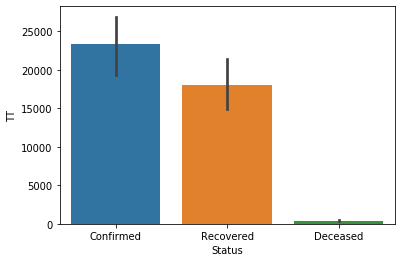

In [18]:
sns.barplot(x='Status',y='TT',data=df)
plt.show()

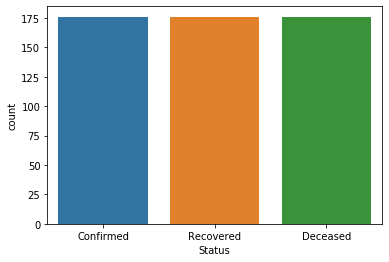

In [19]:
sns.countplot(x='Status',data=df)
plt.show()

In [20]:
# creating delhi dataset for analysis
df_status=df[['Status','DL']]
df_status=pd.DataFrame(df_status)
df_status

,Status,DL
0,Confirmed,7
1,Recovered,1
2,Deceased,1
3,Confirmed,0
4,Recovered,1
...,...,...
523,Recovered,1751
524,Deceased,13
525,Confirmed,2973
526,Recovered,1920


In [21]:
#converting categorical data to numerical data
df1=pd.get_dummies(df_status)
df1

,DL,Status_Confirmed,Status_Deceased,Status_Recovered
0,7,1,0,0
1,1,0,0,1
2,1,0,1,0
3,0,1,0,0
4,1,0,0,1
...,...,...,...,...
523,1751,0,0,1
524,13,0,1,0
525,2973,1,0,0
526,1920,0,0,1


# <h1>1 .Applying linear Regression on Delhi and no of confirmed cases<h1>

In [22]:
#applying linear regression without using sklearn library
x=df1.iloc[:,0].values
y=df1.iloc[:,1].values
model_con=np.polyfit(x,y,1)
model_con

array([1.42922544e-04, 2.36829217e-01])

In [23]:
#slope and intercept
slope=('Slope:',1.42922544e-04)
intercept =("intercept:",2.36829217e-01)

slope,intercept

(('Slope:', 0.000142922544), ('intercept:', 0.236829217))

In [24]:
# predict the rate of confirmed cases
predict = np.poly1d(model_con)
DL = 100
predict(DL)

0.2511214709272065

# <h1>2. Applying linear Regression on Delhi and no of deceased cases</h1>

In [25]:
#applying linear regression without using sklearn library
X=df1.iloc[:,0].values
Y=df1.iloc[:,2].values
model_dec=np.polyfit(X,Y,1)
model_dec

array([-2.35546090e-04,  4.92378693e-01])

In [26]:
# slope and intercept
slope=('Slope:',-2.35546090e-04)
intercept =("intercept:",4.92378693e-01)

slope,intercept

(('Slope:', -0.00023554609), ('intercept:', 0.492378693))

In [27]:
#predicting the rate of deceased cases
predict = np.poly1d(model_dec)
DL = 100
predict(DL)

0.46882408393668734

# <h1>3. Applying linear Regression on Delhi and no of recovered cases</h1>

In [28]:
#applying linear regression without using sklearn library
x=df1.iloc[:,0].values
y=df1.iloc[:,3].values
model_rec=np.polyfit(x,y,1)
model_rec

array([9.26235462e-05, 2.70792091e-01])

In [29]:
# slope and intercept
slope=('Slope:',9.26235462e-05)
intercept =("intercept:",2.70792091e-01)

slope,intercept

(('Slope:', 9.26235462e-05), ('intercept:', 0.270792091))

In [30]:
#predicting the rate of recovered cases
predict = np.poly1d(model_rec)
DL = 100
predict(DL)

0.28005444513610583

# <h1><center>---THANK YOU---</center></h1>